In [1]:
from exp_framework.Ensemble import Ensemble, PretrainedEnsemble
from exp_framework.delegation import DelegationMechanism, UCBDelegationMechanism
from exp_framework.experiment import Experiment
from matplotlib import pyplot as plt
from exp_framework.data_utils import Data
import numpy as np

In [36]:
batch_size = 128
window_size = 5
num_trials = 3

data = Data(
    data_set_name="mnist",
    train_digit_groups=[range(5), range(5, 10)],
    # test_digit_groups=[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]],
    test_digit_groups=[range(5), range(5, 10)],
    batch_size=batch_size,
)

UCB_del_mech = UCBDelegationMechanism(
    batch_size=batch_size, window_size=window_size, ucb_window_size=None
)
NOOP_del_mech = DelegationMechanism(batch_size=batch_size, window_size=window_size)


pretrained_ensemble = PretrainedEnsemble(
    n_voters=10, delegation_mechanism=UCB_del_mech, name="UCB_delegation_ensemble"
)

pretrained_ensemble.do_pretaining(data)

ensembles = [
    pretrained_ensemble,
    Ensemble(
        training_epochs=1,
        n_voters=10,
        delegation_mechanism=NOOP_del_mech,
        name="full_ensemble",
        input_dim=28 * 28,
        output_dim=10,
    ),
]

exp = Experiment(n_trials=num_trials, ensembles=ensembles, data=data)
exp.run()

Switching from digit group range(0, 5) to range(5, 10)
Finished training. Starting testing.
Delegations:  {}
Making delegation from Voter 0 to Voter 8 at t=1.
Making delegation from Voter 1 to Voter 8 at t=1.
Making delegation from Voter 2 to Voter 6 at t=1.
Making delegation from Voter 3 to Voter 0 at t=1.
Making delegation from Voter 5 to Voter 6 at t=1.
Making delegation from Voter 6 to Voter 4 at t=1.
Making delegation from Voter 7 to Voter 4 at t=1.
Making delegation from Voter 8 to Voter 4 at t=1.
Making delegation from Voter 9 to Voter 2 at t=1.
Delegations:  {Voter 0: Voter 8, Voter 1: Voter 8, Voter 2: Voter 6, Voter 3: Voter 0, Voter 5: Voter 6, Voter 6: Voter 4, Voter 7: Voter 4, Voter 8: Voter 4, Voter 9: Voter 2}
Making delegation from Voter 0 to Voter 8 at t=2.
Making delegation from Voter 1 to Voter 2 at t=2.
Making delegation from Voter 2 to Voter 8 at t=2.
Making delegation from Voter 3 to Voter 0 at t=2.
Making delegation from Voter 4 to Voter 2 at t=2.
Making delegat

{'UCB_delegation_ensemble': {0: {'batch_train_acc': [0.9453125,
    0.9765625,
    0.9296875,
    0.9296875,
    0.96875,
    0.953125,
    0.9453125,
    0.8828125,
    0.921875,
    0.953125,
    0.953125,
    0.984375,
    0.953125,
    0.9140625,
    0.9453125,
    0.9375,
    0.921875,
    0.9453125,
    0.9140625,
    0.9296875,
    0.9375,
    0.96875,
    0.9609375,
    0.9375,
    0.921875,
    0.9296875,
    0.921875,
    0.96875,
    0.9375,
    0.9296875,
    0.921875,
    0.9375,
    0.9609375,
    0.9296875,
    0.9453125,
    0.9609375,
    0.96875,
    0.9765625,
    0.953125,
    0.9296875,
    0.953125,
    0.984375,
    0.9609375,
    0.9765625,
    0.921875,
    0.921875,
    0.921875,
    0.9609375,
    0.96875,
    0.9140625,
    0.9140625,
    0.921875,
    0.9765625,
    0.9296875,
    0.9453125,
    0.9453125,
    0.9609375,
    0.9453125,
    0.921875,
    0.8984375,
    0.921875,
    0.9296875,
    0.9296875,
    0.9375,
    0.9453125,
    0.90625,
    0.9531

In [37]:
def calculate_avg_std_test_accs(exp, ensemble_name, n_trials):
    """
    Calculate average and standard deviation of test accuracies for a given number of trials.

    :param exp: The experiment object containing batch metric values.
    :param ensemble_name: The name of the ensemble to calculate metrics for.
    :param n_trials: The number of trials to include in the calculation.
    :return: A tuple of two lists - average accuracies and standard deviations.
    """
    avg_test_accs = []
    std_test_accs = []

    # Initialize a list to collect all test accuracies for each batch
    all_test_accs = [[] for _ in range(len(exp.batch_metric_values[ensemble_name][0]["batch_test_acc"]))]

    # Iterate over each trial and collect test accuracies
    for trial in range(n_trials):
        trial_test_accs = exp.batch_metric_values[ensemble_name][trial]["batch_test_acc"]
        for i, acc in enumerate(trial_test_accs):
            all_test_accs[i].append(acc)

    # Calculate average and standard deviation for each batch
    for batch_accs in all_test_accs:
        avg_test_accs.append(np.mean(batch_accs))
        std_test_accs.append(np.std(batch_accs))

    return avg_test_accs, std_test_accs

# Example usage
UCB_avg_test_accs, UCB_std_test_accs = calculate_avg_std_test_accs(exp, "UCB_delegation_ensemble", num_trials)
full_avg_test_accs, full_std_test_accs = calculate_avg_std_test_accs(exp, "full_ensemble", num_trials)


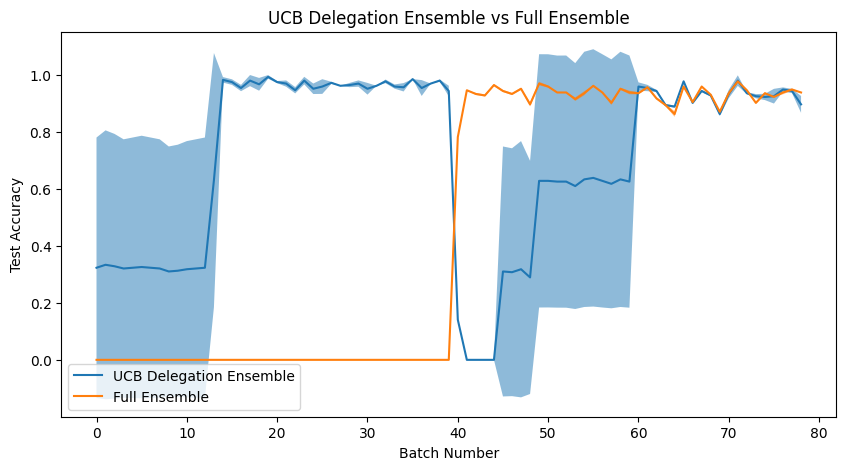

In [38]:
# make a figure with dims 10x5
fig, ax = plt.subplots(figsize=(10, 5))

# plot the average test accuracy for each batch for each ensemble
ax.plot(UCB_avg_test_accs, label="UCB Delegation Ensemble")
ax.fill_between(
    range(len(UCB_avg_test_accs)),
    np.array(UCB_avg_test_accs) - np.array(UCB_std_test_accs),
    np.array(UCB_avg_test_accs) + np.array(UCB_std_test_accs),
    alpha=0.5,
)

ax.plot(full_avg_test_accs, label="Full Ensemble")
ax.fill_between(
    range(len(full_avg_test_accs)),
    np.array(full_avg_test_accs) - np.array(full_std_test_accs),
    np.array(full_avg_test_accs) + np.array(full_std_test_accs),
    alpha=0.5,
)

ax.set_xlabel("Batch Number")
ax.set_ylabel("Test Accuracy")
ax.set_title("UCB Delegation Ensemble vs Full Ensemble")
ax.legend()

plt.show()